In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists


import matplotlib as mpl

In [2]:
hist_bins = np.zeros( shape=(6) )
hist_bins[0] = 0.1
hist_bins[1] = 0.2
hist_bins[2] = 0.3
hist_bins[3] = 0.4
hist_bins[4] = 0.5
hist_bins[5] = 0.6

In [3]:
hist_bins

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [4]:
indices = np.array( [2,4,3,4,5,1])

In [5]:
indices

array([2, 4, 3, 4, 5, 1])

In [6]:
lookup_vals = np.array(hist_bins)[indices]

In [7]:
lookup_vals

array([0.3, 0.5, 0.4, 0.5, 0.6, 0.2])

In [8]:
lookup_vals2 = hist_bins[indices]

In [9]:
lookup_vals2

array([0.3, 0.5, 0.4, 0.5, 0.6, 0.2])

In [10]:
ngen = 1000000

hist_low = -10.
hist_high = 10.

hist_nbins = 100
hist_nbins = 1000


hist_binwidth = (hist_high - hist_low) / hist_nbins

window_dx = 2.
window_dx = 1.
#window_dx = 0.5


window_nbins = int( window_dx / hist_binwidth )




points = np.random.normal( 0., 2., size = ngen)

In [11]:
print(' hist binwidth = %7.3f  window_nbins = %d' % (hist_binwidth, window_nbins))

 hist binwidth =   0.020  window_nbins = 50


In [12]:
nph = np.histogram( points, hist_nbins, range=[hist_low, hist_high] )

In [13]:
nph

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    1,    0,    0,    0,    0,    1,    1,
           0,    0,    1,    0,    0,    1,    0,    0,    0,    1,    0,
           1,    0,    1,    0,    1,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    1,    0,    0,    0,    1,    0,    0,    1,
           0,    0,    1,    2,    1,    1,    2,    1,    1,    1,    1,
           1,    6,    2,    0,    0,    1,    3,    0,    3,    1,    1,
           1,    0,    1,    3,    3,    2,    2,    3,    1,    2,    3,
           2,    7,    0,    3,    4,    7,    3,    3,    5,    7,    6,
          10,    5,    7,    5,    7,    8,    9,    5,    9,    3,    7,
           6,    3,    7,    4,    7, 

In [14]:
nph[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    1,    0,    0,    0,    0,    1,    1,
          0,    0,    1,    0,    0,    1,    0,    0,    0,    1,    0,
          1,    0,    1,    0,    1,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    1,    0,    0,    0,    1,    0,    0,    1,
          0,    0,    1,    2,    1,    1,    2,    1,    1,    1,    1,
          1,    6,    2,    0,    0,    1,    3,    0,    3,    1,    1,
          1,    0,    1,    3,    3,    2,    2,    3,    1,    2,    3,
          2,    7,    0,    3,    4,    7,    3,    3,    5,    7,    6,
         10,    5,    7,    5,    7,    8,    9,    5,    9,    3,    7,
          6,    3,    7,    4,    7,    8,    5,   

In [15]:
hist_pdf = np.zeros(hist_nbins)

for bi in range( hist_nbins ) :
    bilow = bi - window_nbins
    bihigh = bi + window_nbins
    if bilow < 0 : bilow = 0
    if bihigh >= hist_nbins : bihigh = hist_nbins-1
    
    hist_pdf[bi] = np.sum( nph[0][bilow: bihigh] )
    
    check = 0.
    for ci in range(bilow, bihigh) : 
        check += nph[0][ci]
    
    print( "  bi  %4d   %6.1f  bilow %4d  bihigh  %4d   hist_pdf  %7.1f check  %7.1f" % 
          (bi, nph[0][bi], bilow, bihigh, hist_pdf[bi], check))
    
    
    

  bi     0      0.0  bilow    0  bihigh    50   hist_pdf      3.0 check      3.0
  bi     1      0.0  bilow    0  bihigh    51   hist_pdf      3.0 check      3.0
  bi     2      0.0  bilow    0  bihigh    52   hist_pdf      3.0 check      3.0
  bi     3      0.0  bilow    0  bihigh    53   hist_pdf      3.0 check      3.0
  bi     4      0.0  bilow    0  bihigh    54   hist_pdf      4.0 check      4.0
  bi     5      0.0  bilow    0  bihigh    55   hist_pdf      5.0 check      5.0
  bi     6      0.0  bilow    0  bihigh    56   hist_pdf      5.0 check      5.0
  bi     7      0.0  bilow    0  bihigh    57   hist_pdf      5.0 check      5.0
  bi     8      0.0  bilow    0  bihigh    58   hist_pdf      6.0 check      6.0
  bi     9      0.0  bilow    0  bihigh    59   hist_pdf      6.0 check      6.0
  bi    10      0.0  bilow    0  bihigh    60   hist_pdf      6.0 check      6.0
  bi    11      0.0  bilow    0  bihigh    61   hist_pdf      7.0 check      7.0
  bi    12      0.0  bilow  

In [16]:
np.sum(hist_pdf)

99999947.0

In [17]:
hist_pdf_norm = hist_pdf / np.sum(hist_pdf)

In [18]:
hist_norm = nph[0] / np.sum(nph[0])

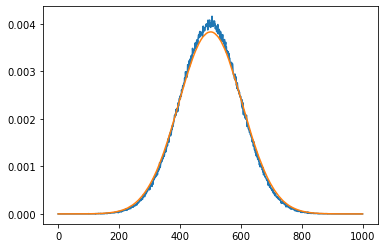

In [19]:
plt.plot(hist_norm)
plt.plot(hist_pdf_norm)

In [20]:
point_bin_indices = ( (points - hist_low) / hist_binwidth )

In [21]:
point_bin_indices

array([590.94981534, 696.52068188, 684.16432992, ..., 558.22959687,
       564.68793323, 547.88502021])

In [22]:
ia = np.array( point_bin_indices, dtype=int)

In [23]:
ia2 = np.array(   ( (points - hist_low) / hist_binwidth ),   dtype=int )

In [24]:
ia

array([590, 696, 684, ..., 558, 564, 547])

In [25]:
ia2

array([590, 696, 684, ..., 558, 564, 547])

In [26]:
for pi in range(20) :
    print(' %3d  %7.2f  %3d   (%7.2f, %7.2f)' % (pi, points[pi], ia[pi], nph[1][ia[pi]], nph[1][ia[pi]+1] ))

   0     1.82  590   (   1.80,    1.82)
   1     3.93  696   (   3.92,    3.94)
   2     3.68  684   (   3.68,    3.70)
   3    -4.05  297   (  -4.06,   -4.04)
   4    -0.28  485   (  -0.30,   -0.28)
   5     3.91  695   (   3.90,    3.92)
   6     0.67  533   (   0.66,    0.68)
   7    -2.85  357   (  -2.86,   -2.84)
   8     0.40  520   (   0.40,    0.42)
   9     0.61  530   (   0.60,    0.62)
  10    -2.74  363   (  -2.74,   -2.72)
  11    -2.32  384   (  -2.32,   -2.30)
  12     0.55  527   (   0.54,    0.56)
  13     1.18  558   (   1.16,    1.18)
  14     3.13  656   (   3.12,    3.14)
  15    -0.43  478   (  -0.44,   -0.42)
  16    -1.43  428   (  -1.44,   -1.42)
  17    -1.06  447   (  -1.06,   -1.04)
  18     3.02  651   (   3.02,    3.04)
  19     0.96  548   (   0.96,    0.98)


In [27]:
nph[1][62]

-8.76

In [28]:
points_pdf_val = hist_pdf_norm[ ia2 ]




In [29]:
points_pdf_val

array([0.00263638, 0.00064912, 0.00080191, ..., 0.00328267, 0.00316978,
       0.00346385])

In [30]:
point_weights = np.ones(ngen)
binsums = np.zeros(hist_nbins)
for bi in range(hist_nbins) :
    binsums[bi] = np.sum( point_weights[ ia2 == bi ] )

In [31]:
binsums

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 

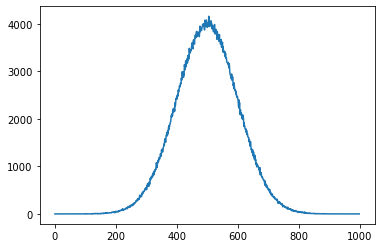

In [32]:
plt.plot(binsums)

In [36]:
for bi in range(int(hist_nbins/2), int(hist_nbins/2)+30) :
    print(" %4d :  %8.6f  %8.6f" % (bi, hist_norm[bi], binsums[bi]/ngen))

  500 :  0.003925  0.003925
  501 :  0.004017  0.004017
  502 :  0.003940  0.003940
  503 :  0.003954  0.003954
  504 :  0.004020  0.004020
  505 :  0.004160  0.004160
  506 :  0.003963  0.003963
  507 :  0.004016  0.004016
  508 :  0.003945  0.003945
  509 :  0.003963  0.003963
  510 :  0.004058  0.004058
  511 :  0.003982  0.003982
  512 :  0.003966  0.003966
  513 :  0.004061  0.004061
  514 :  0.003987  0.003987
  515 :  0.003994  0.003994
  516 :  0.003896  0.003896
  517 :  0.003950  0.003950
  518 :  0.003961  0.003961
  519 :  0.003887  0.003887
  520 :  0.003836  0.003836
  521 :  0.003832  0.003832
  522 :  0.003903  0.003903
  523 :  0.003920  0.003920
  524 :  0.003986  0.003986
  525 :  0.003791  0.003791
  526 :  0.003810  0.003810
  527 :  0.003793  0.003793
  528 :  0.003886  0.003886
  529 :  0.003836  0.003836
